In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from kmodes.kmodes import KModes
from pylab import rcParams
import matplotlib as mlp
rcParams['figure.figsize'] = 18, 10
mlp.rc('xtick', labelsize=20) 
mlp.rc('ytick', labelsize=20) 

In [2]:
print("\nLoading data\n")
df = pd.read_csv('/home/caducovas/externals/kmodes_complaints_k_7.csv')
df_orig = df[['ID', 'Customer complaint narrative', 'Dimension>Label']]




Loading data



In [3]:
df_orig

,ID,Customer complaint narrative,Dimension>Label
0,1,Bank of America continues to process transacti...,Condition>Fees
1,1,Bank of America continues to process transacti...,Condition>Price
2,1,Bank of America continues to process transacti...,Product>CreditDebitCard
3,1,Bank of America continues to process transacti...,Satisfaction>Negative
4,2,Bank of America started charging me a $ XXXX s...,Condition>Fees
5,3,First My debt card was hacked by scammers they...,Product>Account
6,3,First My debt card was hacked by scammers they...,Condition>Fees
7,3,First My debt card was hacked by scammers they...,Condition>Price
8,3,First My debt card was hacked by scammers they...,Product>CreditDebitCard
9,3,First My debt card was hacked by scammers they...,Quality>Reliability


In [21]:
#df_orig['Dimension>Label']

In [4]:
def isnan(value):
    try:
        import math
        return math.isnan(float(value))
    except:
        return False

def splitDim(x):
    if isnan(x):
        return None
    return x.split('>')[0]
def splitLabel(x):
    #print x
    if isnan(x):
        return None
    return x.split('>')[1]

#print len(df_orig['Dimension>Label'].unique())
df2 = df_orig #['Dimension>Label']
#df2['dimension'] = df_orig['Dimension>Label'].apply(splitDim)
#df2['label'] = df_orig['Dimension>Label'].apply(splitLabel)
#df2['Dimension>Label'] = 
df2['Dimension'] = df2['Dimension>Label'].map(splitDim)
df2['Label'] = df2['Dimension>Label'].map(splitLabel)
df2
#for dim in range(len(df_orig['Dimension>Label'].unique())):
#    df_orig['Dimension>Label'].unique()[dim].split('>')
#    df_orig['Dimension>Label'].unique()[dim].split('>')

/usr/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ID,Customer complaint narrative,Dimension>Label,Dimension,Label
0,1,Bank of America continues to process transacti...,Condition>Fees,Condition,Fees
1,1,Bank of America continues to process transacti...,Condition>Price,Condition,Price
2,1,Bank of America continues to process transacti...,Product>CreditDebitCard,Product,CreditDebitCard
3,1,Bank of America continues to process transacti...,Satisfaction>Negative,Satisfaction,Negative
4,2,Bank of America started charging me a $ XXXX s...,Condition>Fees,Condition,Fees
5,3,First My debt card was hacked by scammers they...,Product>Account,Product,Account
6,3,First My debt card was hacked by scammers they...,Condition>Fees,Condition,Fees
7,3,First My debt card was hacked by scammers they...,Condition>Price,Condition,Price
8,3,First My debt card was hacked by scammers they...,Product>CreditDebitCard,Product,CreditDebitCard
9,3,First My debt card was hacked by scammers they...,Quality>Reliability,Quality,Reliability


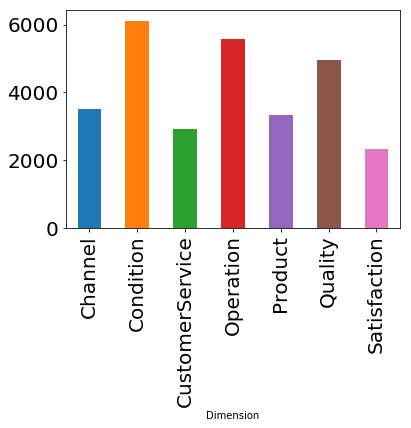

In [4]:
df2.groupby(['Dimension']).Label.count().plot.bar()


In [5]:
df2.groupby(['Dimension']).Label.nunique()
##chanel = 10
#condition = 20
#CustomerService = 11
#Operation = 12
#Product = 19
#Quality = 16
# Satisfaction = 3

Dimension
Channel             6
Condition          18
CustomerService    11
Operation          12
Product            11
Quality            12
Satisfaction        3
Name: Label, dtype: int64

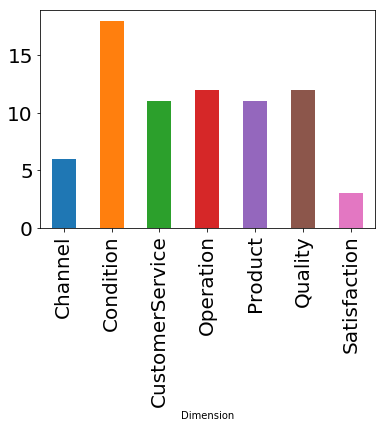

In [6]:
df2.groupby(['Dimension']).Label.nunique().plot.bar()

In [138]:

#list(condition.keys())

['Price',
 'Fees',
 'Cancellation',
 'Profitability',
 'Paperwork',
 'Availability',
 'Promotion',
 'LinkedProducts',
 'MinimumAmount',
 'ContractingChannel',
 'Settlement',
 'Contracting',
 'SubsequentDeposits',
 'MaximumAmount',
 'GenericCondition',
 'Maintenance',
 'TargetCustomer',
 'Renewal']

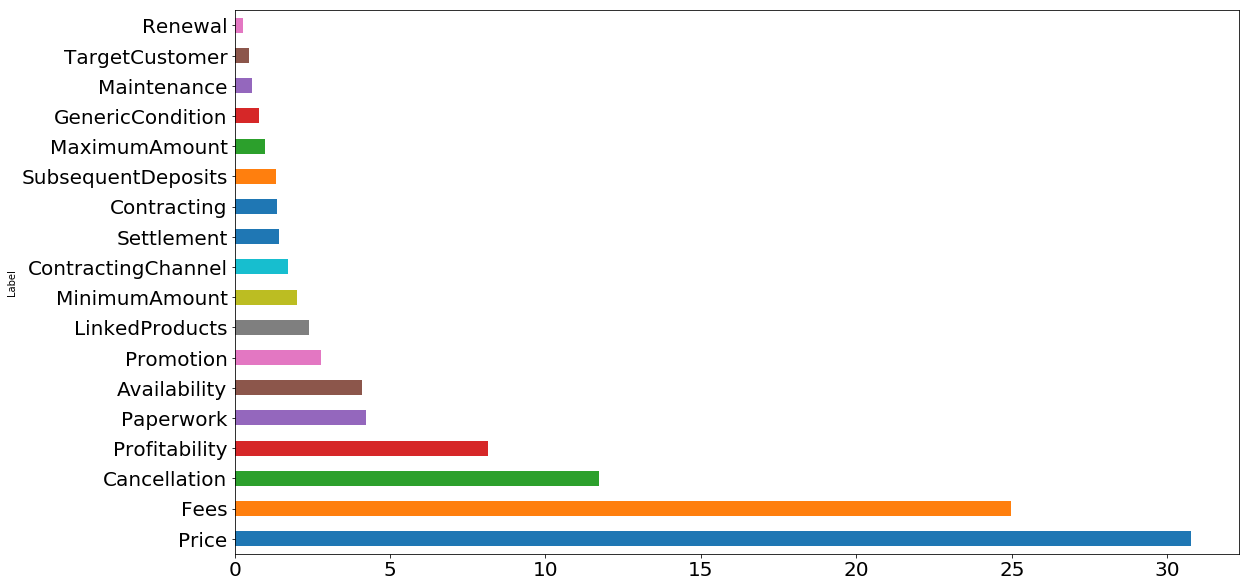

In [69]:
(100*df2[df2.Dimension == 'Condition'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Condition'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh()

In [78]:
#df2[df2.Dimension == 'Condition']

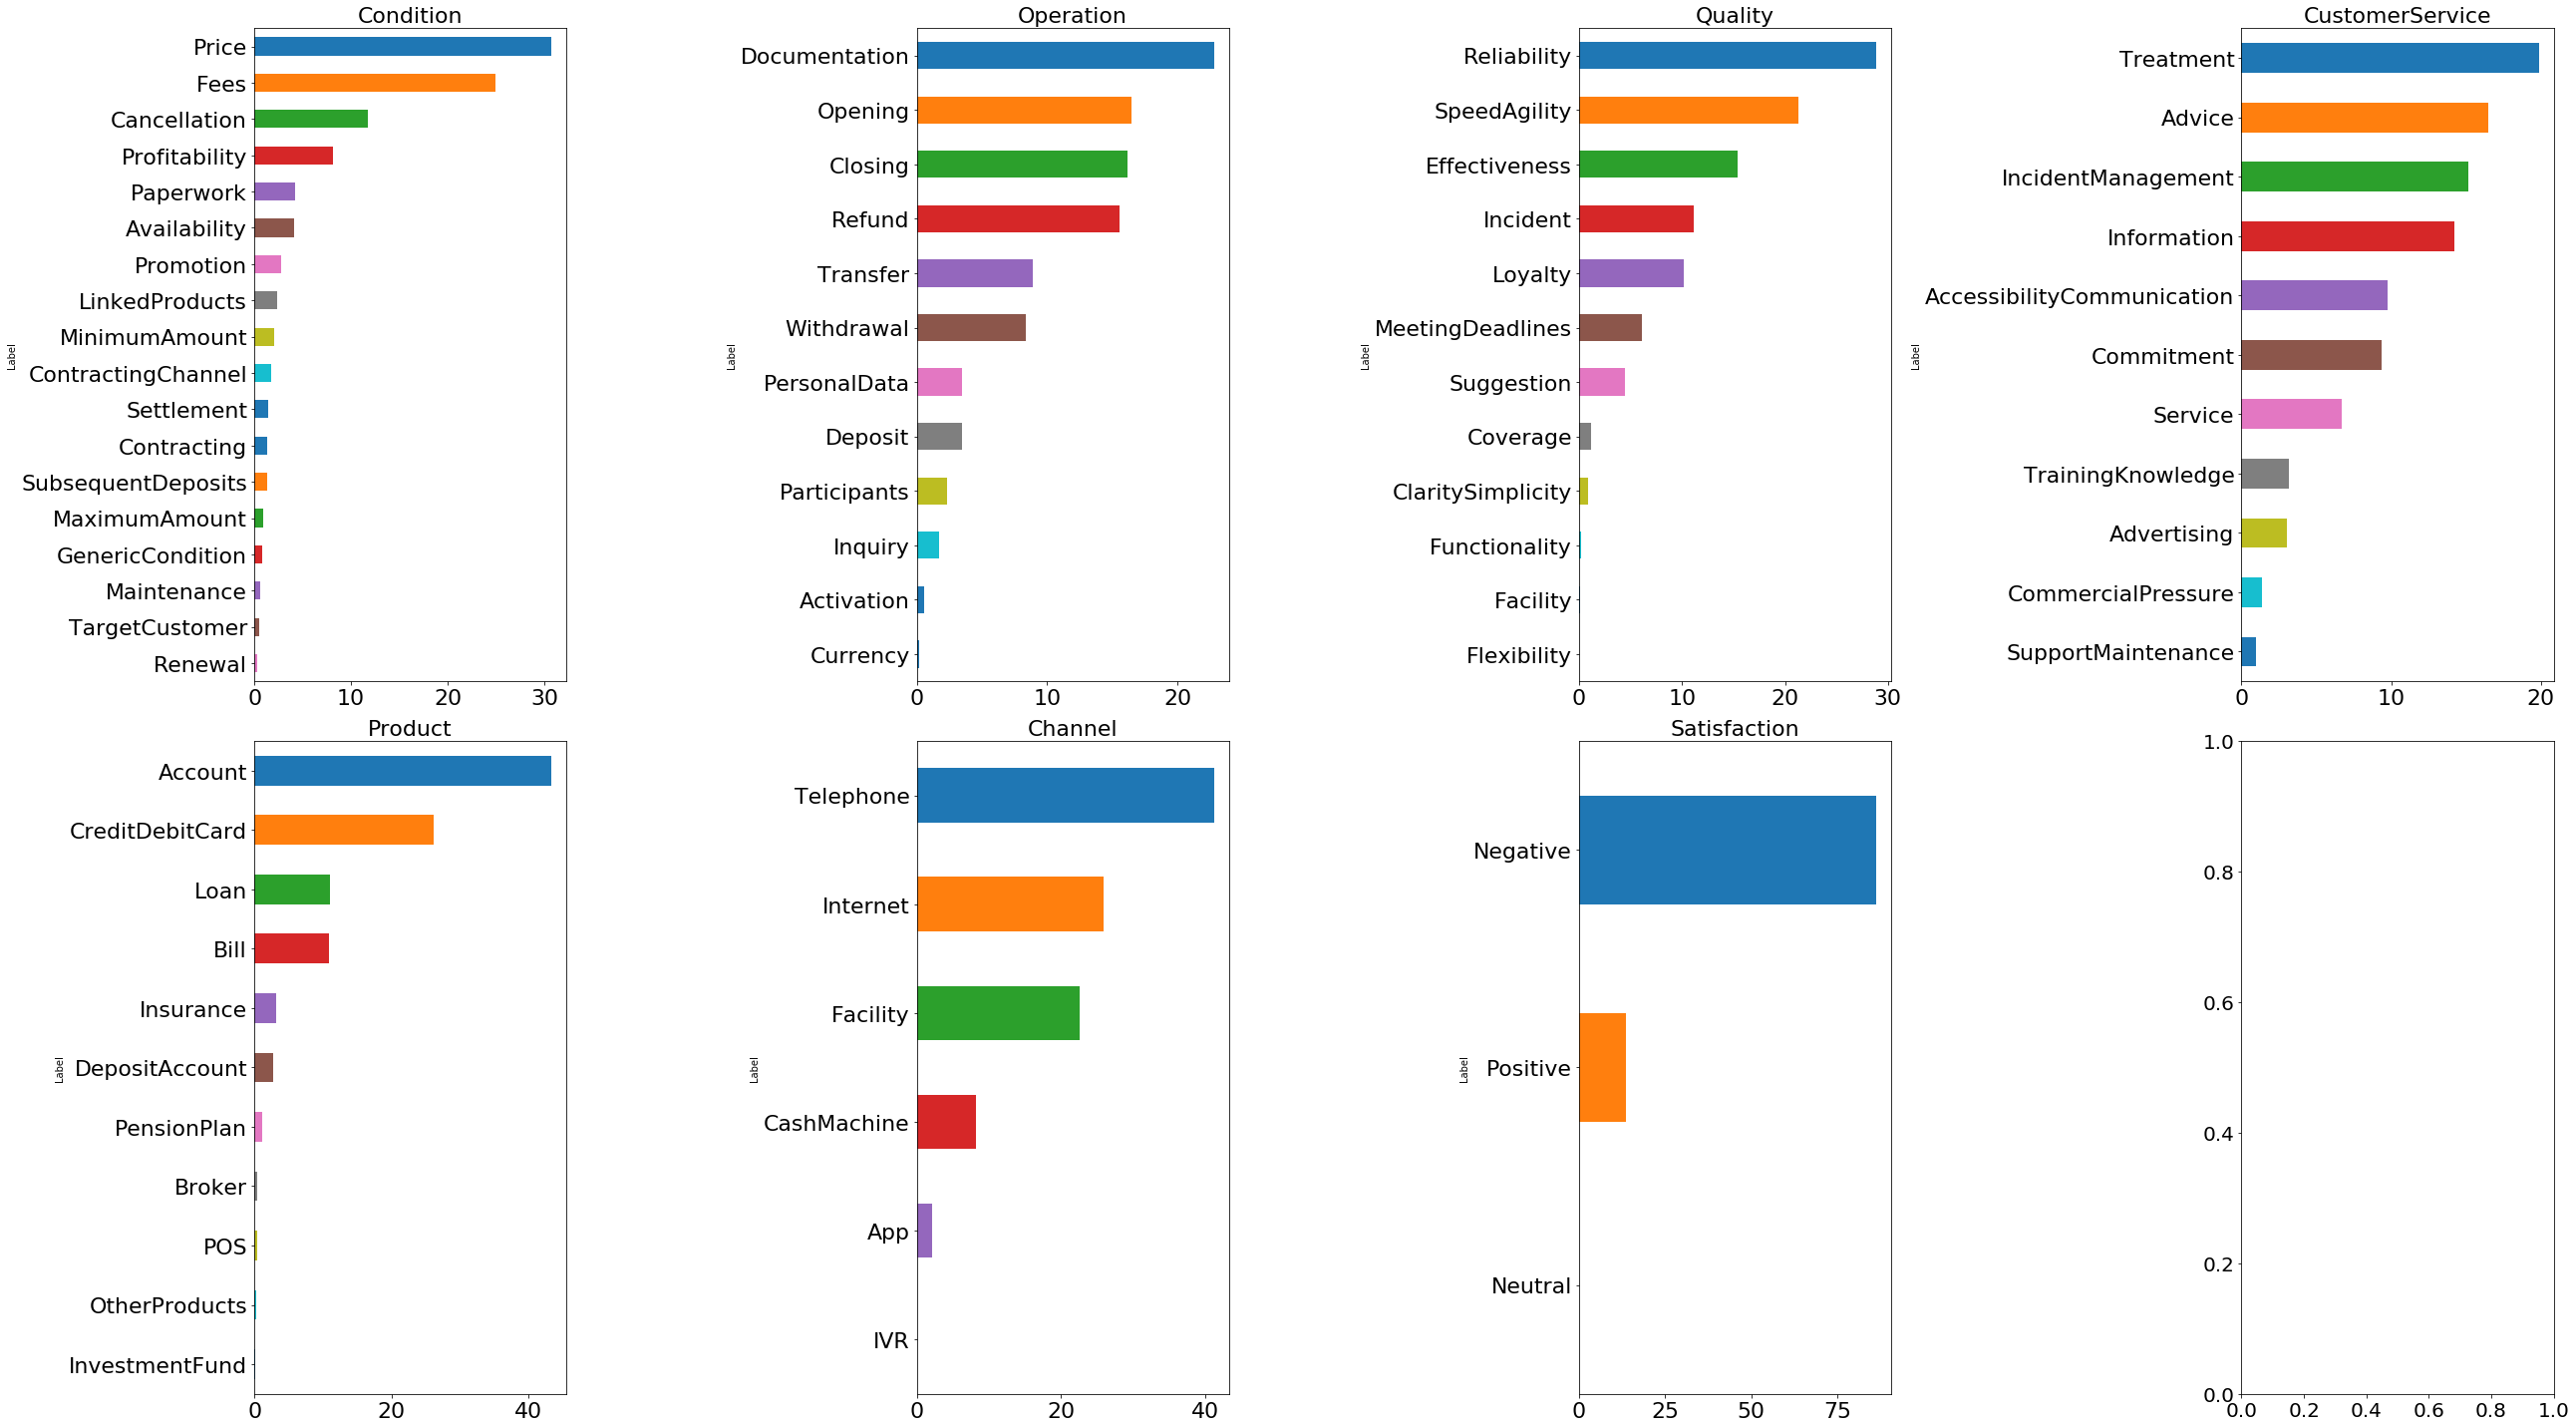

In [72]:



import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4,figsize=(36,20))

(100*df2[df2.Dimension == 'Condition'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Condition'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh(title='Condition',ax=ax[0,0]).invert_yaxis()
(100*df2[df2.Dimension == 'Operation'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Operation'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh(title='Operation',ax=ax[0,1]).invert_yaxis()
(100*df2[df2.Dimension == 'Quality'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Quality'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh(title='Quality',ax=ax[0,2]).invert_yaxis()
(100*df2[df2.Dimension == 'CustomerService'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'CustomerService'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh(title='CustomerService',ax=ax[0,3]).invert_yaxis()
(100*df2[df2.Dimension == 'Product'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Product'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh(title='Product',ax=ax[1,0]).invert_yaxis()
(100*df2[df2.Dimension == 'Channel'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Channel'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh(title='Channel',ax=ax[1,1]).invert_yaxis()
(100*df2[df2.Dimension == 'Satisfaction'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Satisfaction'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh(title='Satisfaction',ax=ax[1,2]).invert_yaxis()

#ind = np.arange(len(condition))
#ax.barh(ind,condition)
#ax.invert_yaxis()
#ax.set_yticks(np.arange(ind) + .5, list(condition.keys()), rotation='horizontal')
ax[0,0].tick_params(axis='both', which='major', labelsize=22)
ax[0,1].tick_params(axis='both', which='major', labelsize=22)
ax[0,2].tick_params(axis='both', which='major', labelsize=22)
ax[0,3].tick_params(axis='both', which='major', labelsize=22)
ax[1,0].tick_params(axis='both', which='major', labelsize=22)
ax[1,1].tick_params(axis='both', which='major', labelsize=22)
ax[1,2].tick_params(axis='both', which='major', labelsize=22)
ax[0,0].title.set_size(22)
ax[0,1].title.set_size(22)
ax[0,2].title.set_size(22)
ax[0,3].title.set_size(22)
ax[1,0].title.set_size(22)
ax[1,1].title.set_size(22)
ax[1,2].title.set_size(22)
fig.tight_layout()
for i, v in enumerate(labels):
    axes.text(i-.25, 
              v/labels[i]+100, 
              labels[i], 
              fontsize=18, 
              color=label_color_list[i])

#plt.title('teste')
#plt.invert_yaxis()

In [14]:
df_filter = df2[(df2['Dimension>Label'] == 'Condition>Price') | (df2['Dimension>Label'] == 'Condition>Fees')
    | (df2['Dimension>Label'] == 'Condition>Cancellation')
    | (df2['Dimension>Label'] == 'Condition>Profitability')
    | (df2['Dimension>Label'] == 'Condition>Paperwork')
    | (df2['Dimension>Label'] == 'Operation>Doumentation')
    | (df2['Dimension>Label'] == 'Operation>Opening')
    | (df2['Dimension>Label'] == 'Operation>Closing')
    | (df2['Dimension>Label'] == 'Operation>Refund')
    | (df2['Dimension>Label'] == 'Quality>Reliability')
    | (df2['Dimension>Label'] == 'Quality>SpeedAgility')
    | (df2['Dimension>Label'] == 'Quality>Effectiveness')
    | (df2['Dimension>Label'] == 'Quality>Incident')
    | (df2['Dimension>Label'] == 'CustomerService>Treatment')
    | (df2['Dimension>Label'] == 'CustomerService>Advice')
    | (df2['Dimension>Label'] == 'CustomerService>IncidentManagement')
    | (df2['Dimension>Label'] == 'CustomerService>Information')]
#    | (df2['Dimension>Label'] == 'Product>Account')
#    | (df2['Dimension>Label'] == 'Quality>Fees')
#    | (df2['Dimension>Label'] == 'Quality>Fees')
#    | (df2['Dimension>Label'] == 'Quality>Fees')
#    | (df2['Dimension>Label'] == 'Quality>Fees')

In [15]:
df_filter

,ID,Customer complaint narrative,Dimension>Label,Dimension,Label
0,1,Bank of America continues to process transacti...,Condition>Fees,Condition,Fees
1,1,Bank of America continues to process transacti...,Condition>Price,Condition,Price
4,2,Bank of America started charging me a $ XXXX s...,Condition>Fees,Condition,Fees
6,3,First My debt card was hacked by scammers they...,Condition>Fees,Condition,Fees
7,3,First My debt card was hacked by scammers they...,Condition>Price,Condition,Price
9,3,First My debt card was hacked by scammers they...,Quality>Reliability,Quality,Reliability
11,4,Fraudulent Checks and fraudulent withdrawals w...,Quality>Reliability,Quality,Reliability
13,4,Fraudulent Checks and fraudulent withdrawals w...,Condition>Price,Condition,Price
15,4,Fraudulent Checks and fraudulent withdrawals w...,Condition>Fees,Condition,Fees
16,4,Fraudulent Checks and fraudulent withdrawals w...,Operation>Closing,Operation,Closing


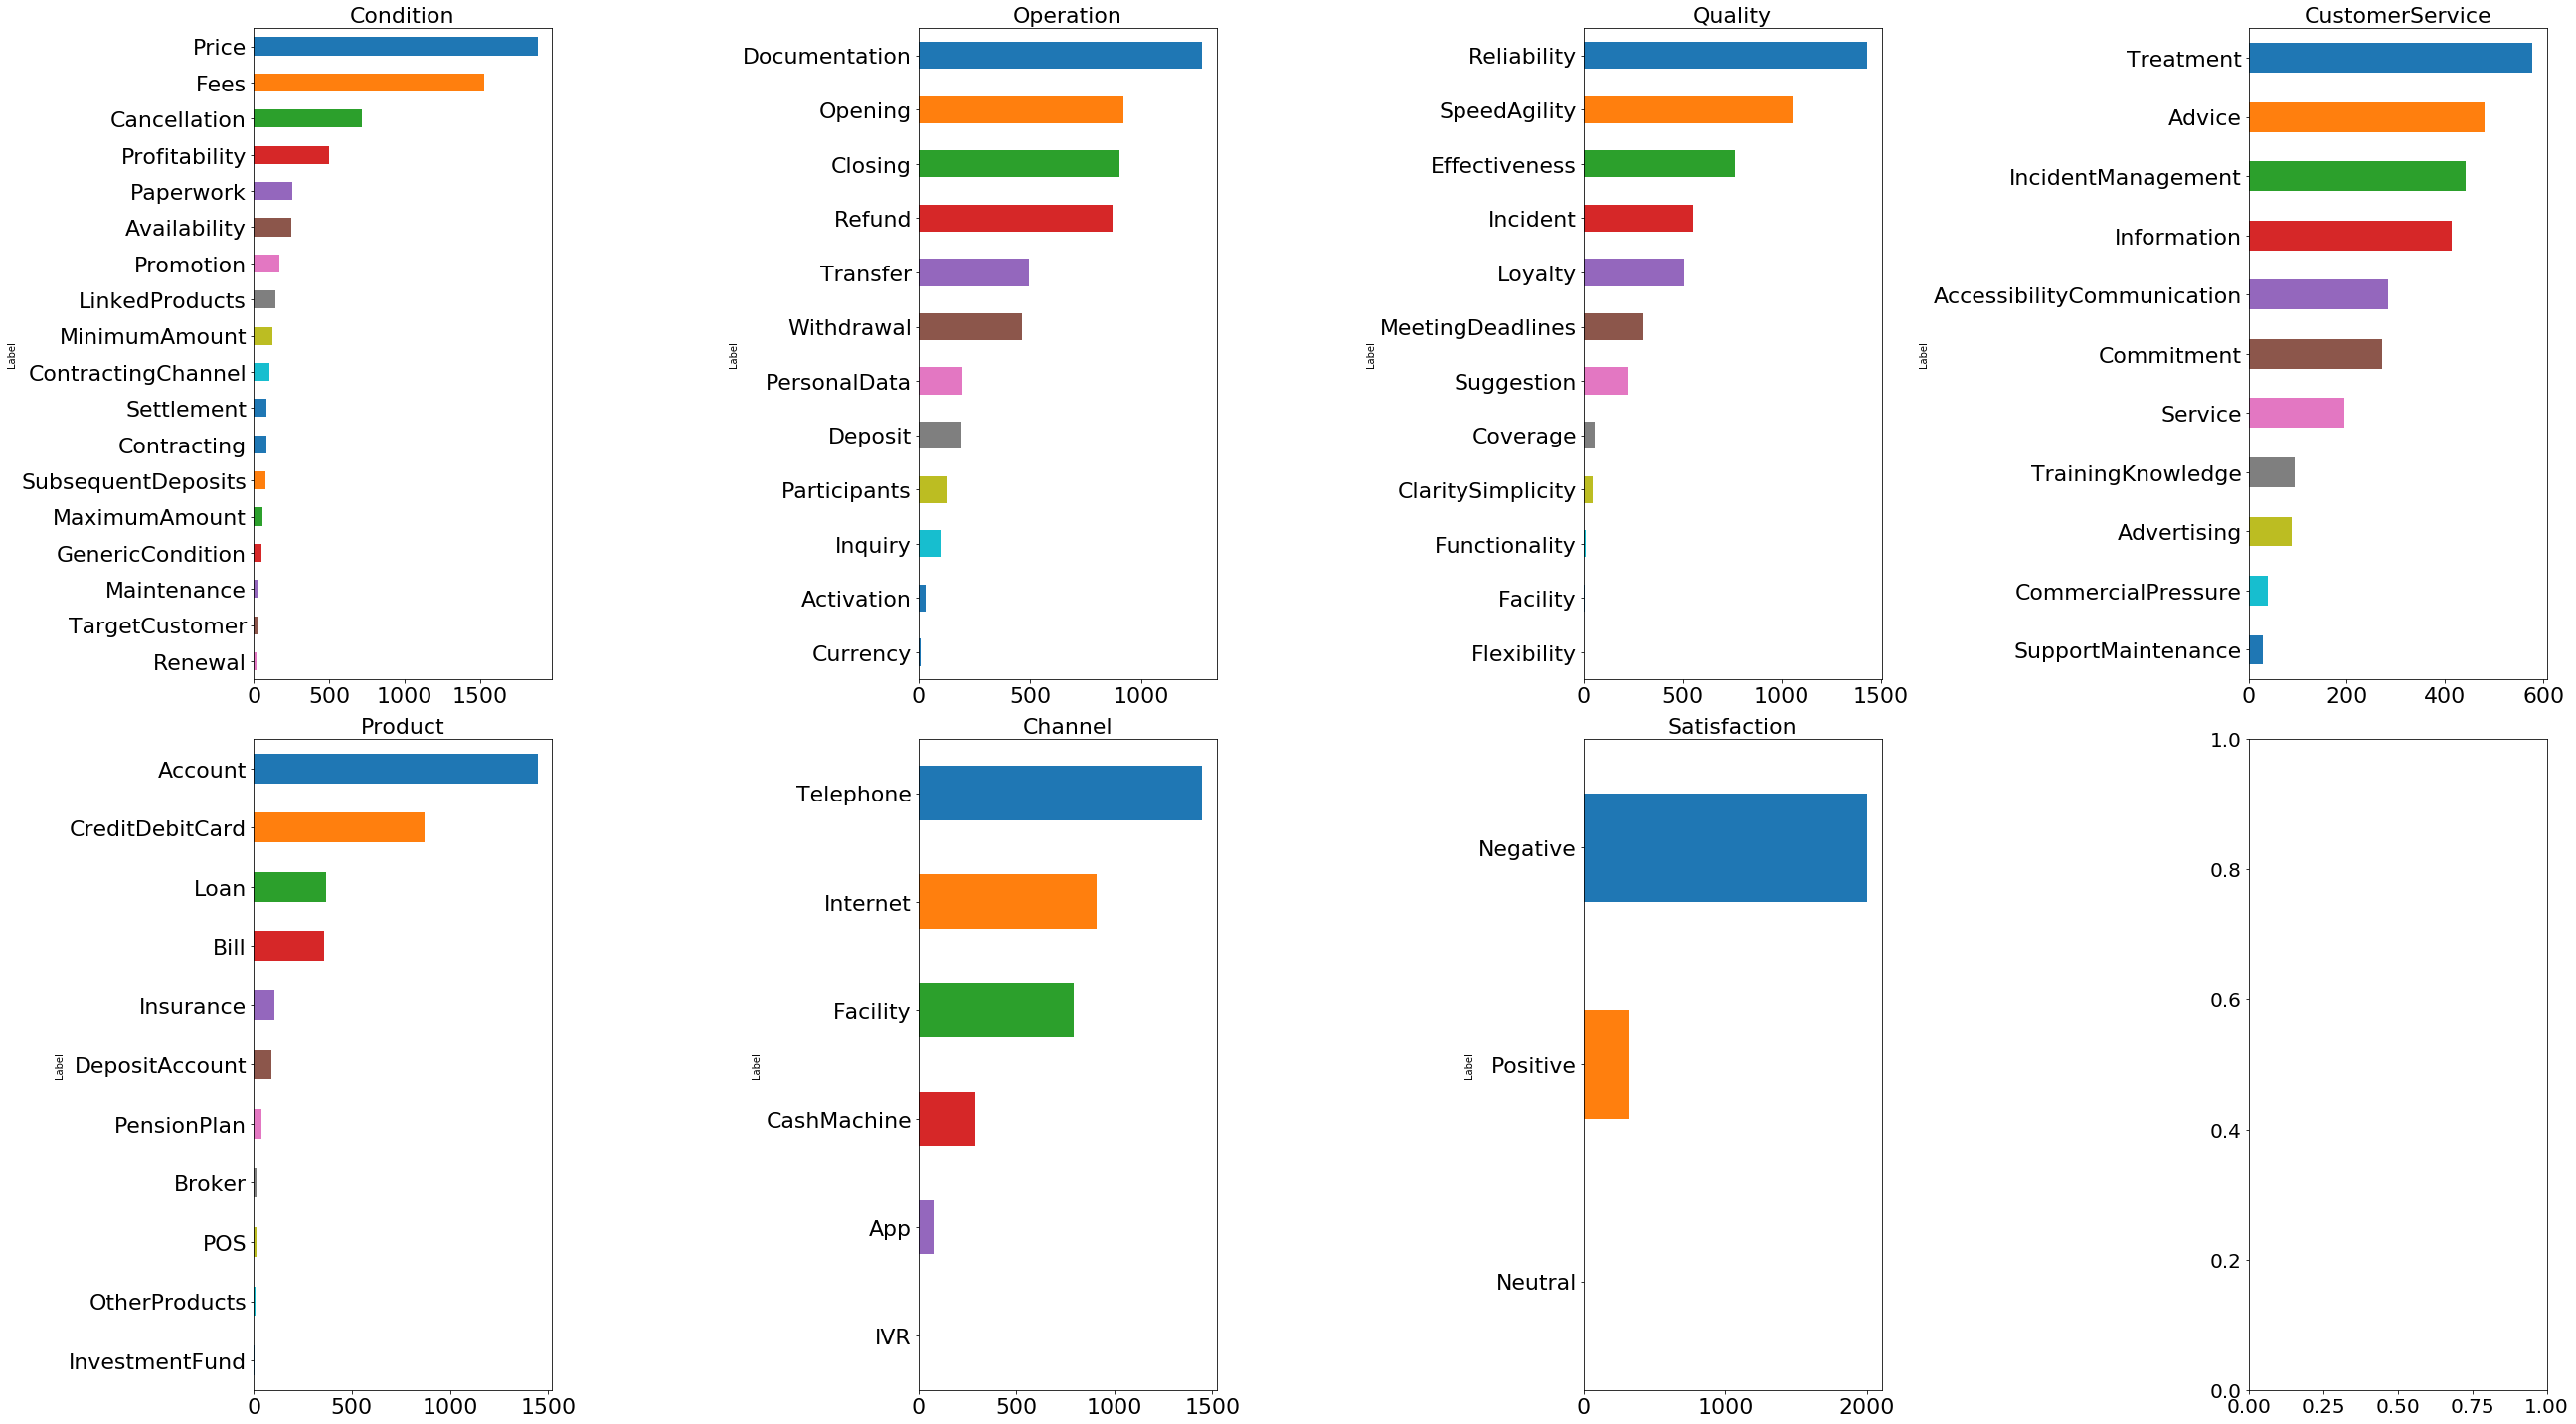

In [164]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,4,figsize=(36,20))

df2[df2.Dimension == 'Condition'].groupby(['Label']).Label.count().sort_values(ascending=False).plot.barh(title='Condition',ax=ax[0,0]).invert_yaxis()
df2[df2.Dimension == 'Operation'].groupby(['Label']).Label.count().sort_values(ascending=False).plot.barh(title='Operation',ax=ax[0,1]).invert_yaxis()
df2[df2.Dimension == 'Quality'].groupby(['Label']).Label.count().sort_values(ascending=False).plot.barh(title='Quality',ax=ax[0,2]).invert_yaxis()
df2[df2.Dimension == 'CustomerService'].groupby(['Label']).Label.count().sort_values(ascending=False).plot.barh(title='CustomerService',ax=ax[0,3]).invert_yaxis()
df2[df2.Dimension == 'Product'].groupby(['Label']).Label.count().sort_values(ascending=False).plot.barh(title='Product',ax=ax[1,0]).invert_yaxis()
df2[df2.Dimension == 'Channel'].groupby(['Label']).Label.count().sort_values(ascending=False).plot.barh(title='Channel',ax=ax[1,1]).invert_yaxis()
df2[df2.Dimension == 'Satisfaction'].groupby(['Label']).Label.count().sort_values(ascending=False).plot.barh(title='Satisfaction',ax=ax[1,2]).invert_yaxis()

#ind = np.arange(len(condition))
#ax.barh(ind,condition)
#ax.invert_yaxis()
#ax.set_yticks(np.arange(ind) + .5, list(condition.keys()), rotation='horizontal')
ax[0,0].tick_params(axis='both', which='major', labelsize=22)
ax[0,1].tick_params(axis='both', which='major', labelsize=22)
ax[0,2].tick_params(axis='both', which='major', labelsize=22)
ax[0,3].tick_params(axis='both', which='major', labelsize=22)
ax[1,0].tick_params(axis='both', which='major', labelsize=22)
ax[1,1].tick_params(axis='both', which='major', labelsize=22)
ax[1,2].tick_params(axis='both', which='major', labelsize=22)
ax[0,0].title.set_size(22)
ax[0,1].title.set_size(22)
ax[0,2].title.set_size(22)
ax[0,3].title.set_size(22)
ax[1,0].title.set_size(22)
ax[1,1].title.set_size(22)
ax[1,2].title.set_size(22)
fig.tight_layout()
#plt.title('teste')
#plt.invert_yaxis()

In [166]:
df2[df2.Label == 'Telephone' ]

,ID,Customer complaint narrative,Dimension>Label,Dimension,Label
21,4,Fraudulent Checks and fraudulent withdrawals w...,Channel>Telephone,Channel,Telephone
35,5,Hello Sir /Madam ( To whom it may concern ) I ...,Channel>Telephone,Channel,Telephone
59,7,I bank at Chase and I am a small business owne...,Channel>Telephone,Channel,Telephone
79,9,I had a transaction of XXXX dollars from XXXX ...,Channel>Telephone,Channel,Telephone
83,10,I have a personal checking account and an auto...,Channel>Telephone,Channel,Telephone
129,16,My father left me a trust fund with a local ba...,Channel>Telephone,Channel,Telephone
151,18,"My visa account statement ( Bank of America, o...",Channel>Telephone,Channel,Telephone
182,21,On XX/XX/XXXX and XX/XX/XXXX my checking accou...,Channel>Telephone,Channel,Telephone
192,22,On XXXX my husband received a notice that we n...,Channel>Telephone,Channel,Telephone
239,30,During Key Bank 's takeover of First Niagara B...,Channel>Telephone,Channel,Telephone


In [16]:
dummies = pd.get_dummies(df_filter['Dimension>Label'])
dummies['complaint_id'] = df_filter['ID'].values
df = dummies.groupby('complaint_id').sum()
df.keys()


Index([u'Condition>Cancellation', u'Condition>Fees', u'Condition>Paperwork',
       u'Condition>Price', u'Condition>Profitability',
       u'CustomerService>Advice', u'CustomerService>IncidentManagement',
       u'CustomerService>Information', u'CustomerService>Treatment',
       u'Operation>Closing', u'Operation>Opening', u'Operation>Refund',
       u'Quality>Effectiveness', u'Quality>Incident', u'Quality>Reliability',
       u'Quality>SpeedAgility'],
      dtype='object')

In [17]:
df

,Condition>Cancellation,Condition>Fees,Condition>Paperwork,Condition>Price,Condition>Profitability,CustomerService>Advice,CustomerService>IncidentManagement,CustomerService>Information,CustomerService>Treatment,Operation>Closing,Operation>Opening,Operation>Refund,Quality>Effectiveness,Quality>Incident,Quality>Reliability,Quality>SpeedAgility
complaint_id,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,1
5,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
6,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1
7,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1
8,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [19]:
df.values

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]], dtype=uint8)

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import inconsistent
from scipy.cluster.hierarchy import fcluster
from sklearn.utils import shuffle
from sklearn.neighbors.kde import KernelDensity

In [20]:
#import sompy
import somoclu

/home/caducovas/.local/lib/python2.7/site-packages/seaborn/utils.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib64/python2.7/site-packages/zmq/eve

In [172]:
#n_rows, n_columns = 100, 160
n_rows, n_columns = 10,10
#som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False,initialization="pca",gridtype='rectangular',neighborhood='bubble')
#%time som.train(dataset,epochs=1000, radius0=10, radiusN=2, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')
%time som.train(df.values,epochs=20000, radius0=2.84, radiusN=1, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')

KeyboardInterrupt: 

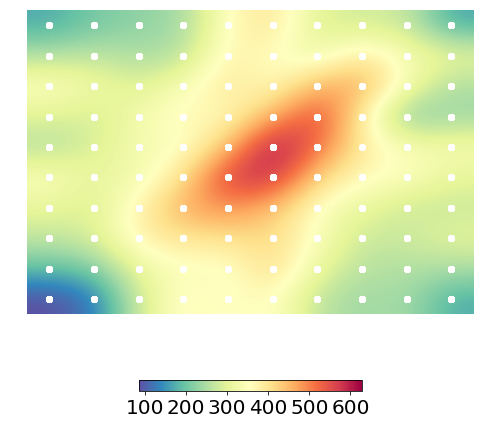

<module 'matplotlib.pyplot' from '/home/caducovas/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [138]:
som.view_umatrix(bestmatches=True,colorbar=1)

In [171]:
#n_rows, n_columns = 100, 160
n_rows, n_columns = 10,10
#som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
som2 = somoclu.Somoclu(n_columns, n_rows, compactsupport=False,initialization="pca",gridtype='rectangular',neighborhood='bubble')
#%time som.train(dataset,epochs=1000, radius0=10, radiusN=2, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')
%time som2.train(df.values,epochs=10000, radius0=2.84, radiusN=1, radiuscooling='linear', scale0=0.1, scaleN=0.01, scalecooling='linear')

CPU times: user 45min 51s, sys: 422 ms, total: 45min 52s
Wall time: 11min 28s


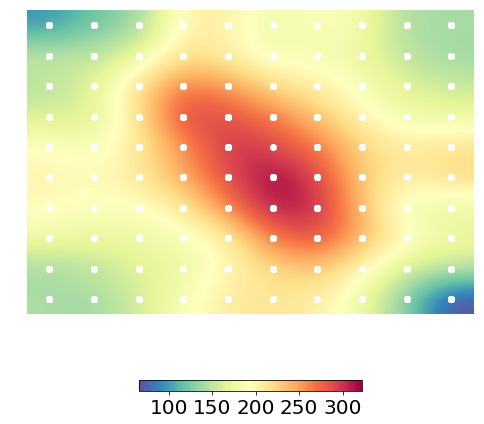

<module 'matplotlib.pyplot' from '/home/caducovas/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [79]:
som2.view_umatrix(bestmatches=True,colorbar=1)

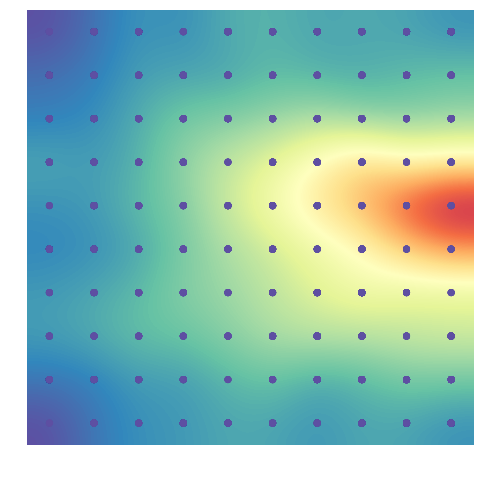

<module 'matplotlib.pyplot' from '/home/caducovas/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [74]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som2.cluster(algorithm=algorithm)
som2.view_umatrix(bestmatches=True)

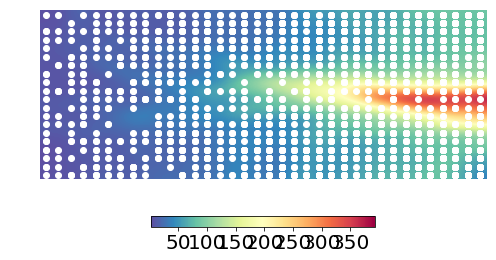

<module 'matplotlib.pyplot' from '/home/caducovas/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [69]:
som2.view_umatrix(bestmatches=True,colorbar=1)

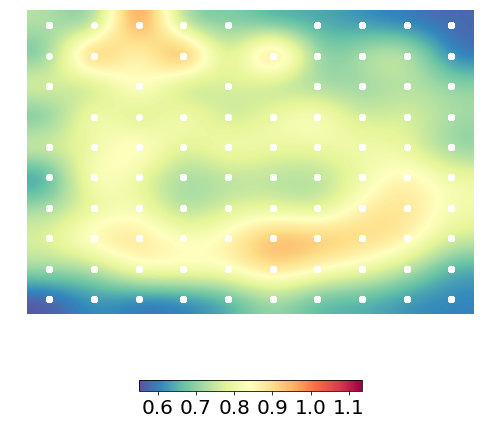

<module 'matplotlib.pyplot' from '/home/caducovas/.local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

In [22]:
som.view_umatrix(bestmatches=True,colorbar=1)

In [80]:
exSom= som

In [133]:
som=exSom

In [139]:
bmus = som.get_bmus(som.get_surface_state())

In [140]:
W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))

In [141]:
W.shape

(100, 21)

In [142]:
# generate the linkage matrix
Z = linkage(W, 'ward')

In [143]:
#This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances
c, coph_dists = cophenet(Z, pdist(W))
c

0.6900035938409544

In [144]:
Z.shape


(99, 4)

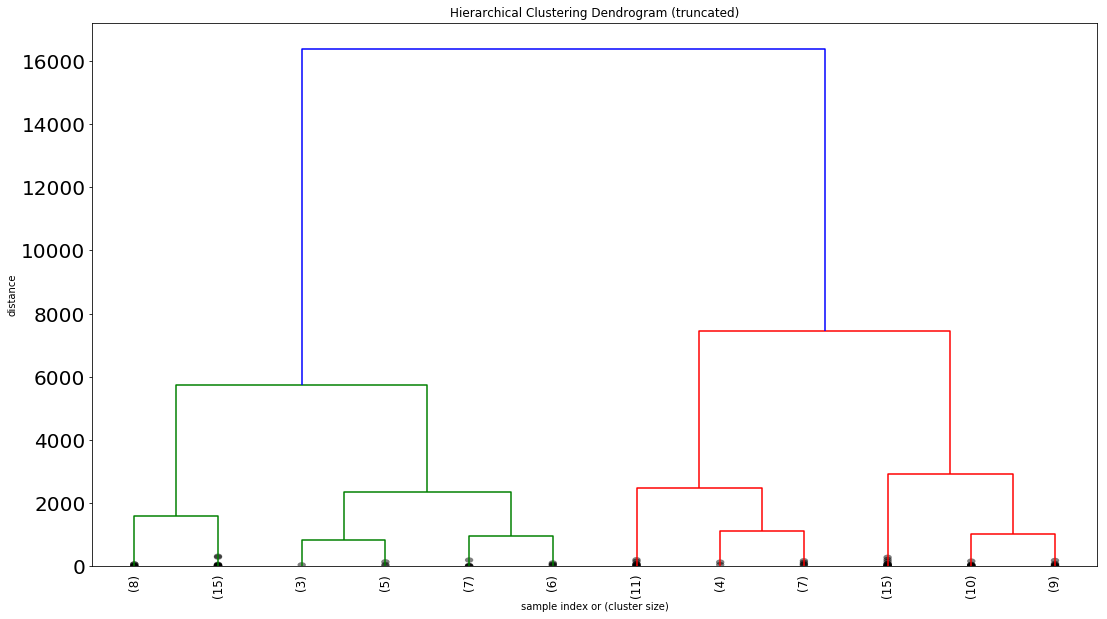

In [145]:
import matplotlib.pyplot as plt


plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()



In [151]:
ind = np.argmax(si)
print ind,si[ind]

16 0.63092905


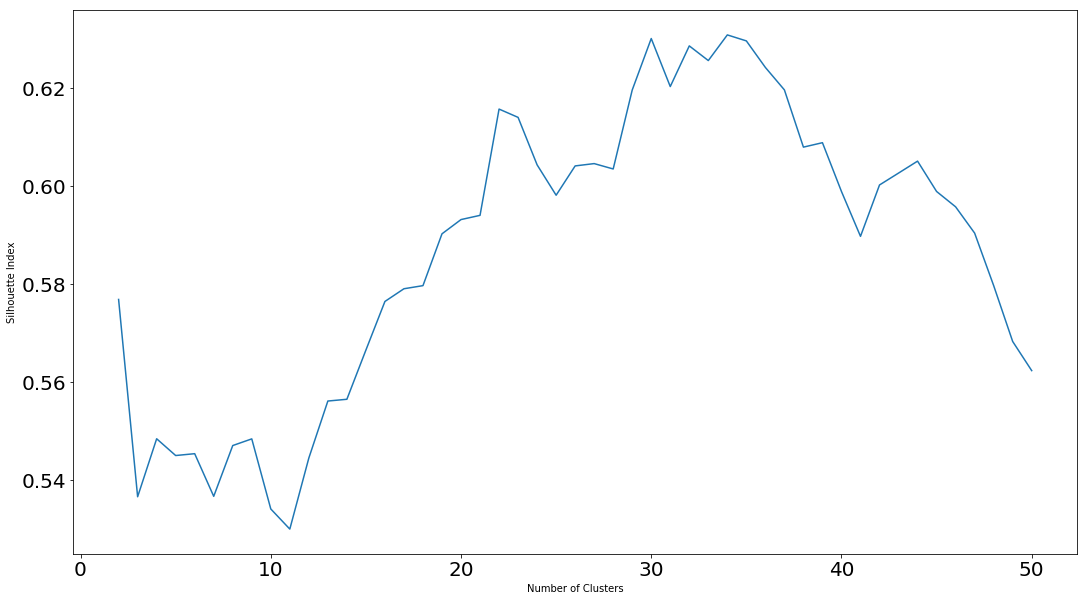

In [147]:
import sklearn
plt.rc('legend',**{'fontsize':10})
k = []
si = []
#sklearn.metrics.silhouette_score(W, ss, metric='sqeuclidean')
for n in range(50,1,-1):
    clusters = fcluster(Z, n, criterion='maxclust')
    ss = sklearn.metrics.silhouette_score(W, clusters,metric='euclidean')
    k.append(n)
    si.append(ss)
    #print(n,ss)
#plt.setp(legend.get_title(),fontsize='12')
plt.plot(k, si)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Index')
plt.show()

In [152]:
clusters = fcluster(Z, 16, criterion='maxclust')

In [153]:
clusters

array([10, 10, 11, 11,  8,  9, 15, 14, 12, 13, 10, 10, 11, 11,  8, 16, 14,
       14, 13,  3, 11, 11, 11,  8,  9, 15, 14, 13,  3,  2,  8,  8,  8,  9,
       15, 14, 13,  2,  2,  2,  9,  9, 16, 15, 14, 12,  2,  2,  1,  1, 16,
       16, 15, 14, 12,  2,  1,  7,  7,  7, 14, 14, 14, 13,  3,  1,  7,  6,
        6,  6, 12, 12, 12,  3,  2,  1,  6,  6,  5,  5, 13, 13,  3,  2,  1,
        7,  6,  5,  5,  4, 13, 13,  3,  1,  1,  7,  6,  5,  4,  4],
      dtype=int32)

In [154]:
bmus.shape

(3341, 2)

In [155]:
def cluster_data(bmus,clusters,n_rows, n_columns):
    cluster_data = []
    row, column = bmus.shape
    cr = clusters.reshape(n_rows,n_columns)
    for r in range(row):
        cluster_data.append(cr[bmus[r][1]][bmus[r][0]])##aparentemente a funcao get_bmus retorna (coluna,linha)
    return cluster_data

*Predict new Data*

For a new data 'data'

    reshapes the (10,12,3) code book to W (120,3)
    store data in X
    Calculate the distance between the data and the codebooks
    create a BMU (150,120) for each instance of the data with the activated neurons
    reshape BMU to NBMU(150,10,12)
    new_bmus (150,2) - for each instance of the data the codebook where it was allocated


In [33]:
#W = som.codebook.reshape((som.codebook.shape[0] * som.codebook.shape[1], som.codebook.shape[2]))
#X = X_test
#D = -2*np.dot(W, X.T) + (W**2).sum(1)[:, None] + (X**2).sum(1)[:, None].T
#BMU = (D==D.min(0)[None,:]).astype("float32").T
#NBMU =  BMU.reshape((X.shape[0], som.codebook.shape[0], som.codebook.shape[1]))
#new_bmus = np.vstack(NBMU.nonzero()[1:][::-1]).T

In [156]:
clusterData = cluster_data(bmus,clusters,10,10)
#newcluster = cluster_data(new_bmus,clusters,10,10)
print(clusterData)
len(clusterData)
#print(newcluster)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,

3341

In [44]:
len(df)

3519

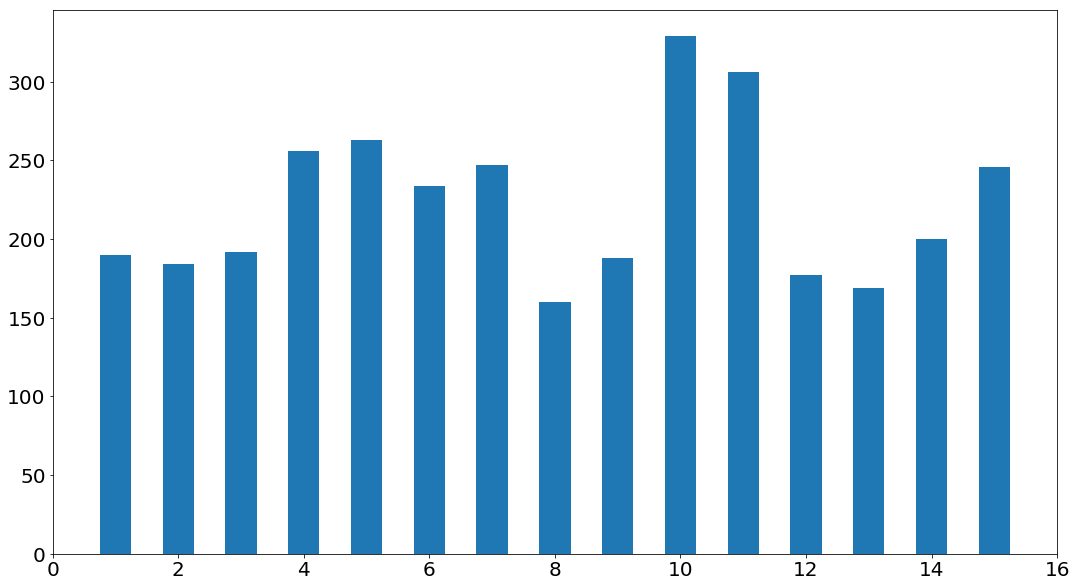

In [158]:
hist, bin_edges = np.histogram(clusterData, bins = range(17))
plt.bar(bin_edges[:-1], hist, width = 0.5)
plt.xlim(min(bin_edges), max(bin_edges))
#fig.set_xticklabels(x_labels)
plt.show()

In [47]:
df

,complaint_id,Channel>App,Channel>CashMachine,Channel>Facility,Channel>Facility>Office,Channel>IVR,Channel>Internet,Channel>Internet>Chat,Channel>Internet>SocialNetwork,Channel>Telephone,...,Quality>Incident,Quality>Loyalty,Quality>MeetingDeadlines,Quality>Reliability,Quality>SpeedAgility,Quality>Suggestion,Satisfaction>Negative,Satisfaction>Neutral,Satisfaction>Positive,cluster_label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,4,0,1,0,0,0,0,0,0,1,...,1,0,0,1,1,0,1,0,0,2
4,5,0,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
5,6,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,2
6,7,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,3
8,9,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9,10,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,1,0,0,3


In [48]:
km.labels_

array([4, 1, 1, ..., 1, 3, 0], dtype=uint8)

In [110]:
print("Performing Kmodes clustering.\n")
km = KModes(n_clusters=7, init='Huang', n_init=5, verbose=1)
km.fit(df.values)
df['cluster_label'] = km.labels_
df


Performing Kmodes clustering.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1439, cost: 17631.0
Run 1, iteration: 2/100, moves: 0, cost: 17631.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 639, cost: 17485.0
Run 2, iteration: 2/100, moves: 129, cost: 17485.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1190, cost: 17553.0
Run 3, iteration: 2/100, moves: 0, cost: 17553.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 695, cost: 17957.0
Run 4, iteration: 2/100, moves: 4, cost: 17957.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1063, cost: 17669.0
Run 5, iteration: 2/100, moves: 137, cost: 17669.0
Best run was number 2


,index,complaint_id,Condition>Cancellation,Condition>Fees,Condition>Paperwork,Condition>Price,Condition>Profitability,CustomerService>Advice,CustomerService>IncidentManagement,CustomerService>Information,CustomerService>Treatment,Operation>Closing,Operation>Opening,Operation>Refund,Quality>Effectiveness,Quality>Incident,Quality>Reliability,Quality>SpeedAgility,cluster_labels,cluster_label
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2
1,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
2,2,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,4
3,3,4,1,1,0,1,0,1,0,0,0,1,1,0,0,1,1,1,2,6
4,4,5,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,2,6
5,5,6,1,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,2,6
6,6,7,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,2,1
7,7,8,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,2,4
8,8,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2
9,9,10,0,1,0,1,0,1,0,1,1,0,0,1,1,0,1,1,2,4


In [159]:
df['cluster_labels'] = clusterData 
print("Number of complaints in each cluster:\n")
print(df.cluster_labels.value_counts())

df.reset_index(inplace=True)

Number of complaints in each cluster:

10    329
11    306
5     263
4     256
7     247
6     234
14    200
3     192
1     190
9     188
2     184
12    177
13    169
8     160
16    143
15    103
Name: cluster_labels, dtype: int64


ValueError: cannot insert level_0, already exists

In [160]:
#df['cluster_labels'] = cluster1 
labels = pd.merge(df_filter, df[['complaint_id', 'cluster_labels']], left_on='ID', right_on='complaint_id')
#labels.to_csv('kmodes_clustered_complaints.csv')
print("\nFinished writing output file to clustered_complaints.csv\n")
labels


Finished writing output file to clustered_complaints.csv



,ID,Customer complaint narrative,Dimension>Label,Dimension,Label,complaint_id,cluster_labels
0,1,Bank of America continues to process transacti...,Condition>Fees,Condition,Fees,1,10
1,1,Bank of America continues to process transacti...,Condition>Price,Condition,Price,1,10
2,2,Bank of America started charging me a $ XXXX s...,Condition>Fees,Condition,Fees,2,10
3,3,First My debt card was hacked by scammers they...,Condition>Fees,Condition,Fees,3,10
4,3,First My debt card was hacked by scammers they...,Condition>Price,Condition,Price,3,10
5,3,First My debt card was hacked by scammers they...,Quality>Reliability,Quality,Reliability,3,10
6,4,Fraudulent Checks and fraudulent withdrawals w...,Quality>Reliability,Quality,Reliability,4,10
7,4,Fraudulent Checks and fraudulent withdrawals w...,Condition>Price,Condition,Price,4,10
8,4,Fraudulent Checks and fraudulent withdrawals w...,Condition>Fees,Condition,Fees,4,10
9,4,Fraudulent Checks and fraudulent withdrawals w...,Operation>Closing,Operation,Closing,4,10


In [82]:
print len(df), len(labels), len(df[df.cluster_labels == 1]), len(df[df.cluster_labels == 2]), len(df[df.cluster_labels == 3])

3519 28756 2180 709 630


In [161]:
cluster1 = 100*labels[labels.cluster_labels == 1].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 1])
cluster1[cluster1 > 30]

Dimension>Label
Condition>Price         55.263158
Condition>Fees          45.789474
Quality>Reliability     39.473684
Quality>SpeedAgility    36.315789
Name: Dimension>Label, dtype: float64

In [162]:
cluster2 = 100*labels[labels.cluster_labels == 2].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 2])
cluster2[cluster2 > 30]

Dimension>Label
Condition>Price         66.847826
Quality>Reliability     44.021739
Condition>Fees          44.021739
Quality>SpeedAgility    32.065217
Name: Dimension>Label, dtype: float64

In [163]:
cluster3 = 100*labels[labels.cluster_labels == 3].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 3])
cluster3[cluster3 > 30]

Dimension>Label
Condition>Price         54.687500
Condition>Fees          52.604167
Quality>Reliability     42.187500
Quality>SpeedAgility    34.375000
Name: Dimension>Label, dtype: float64

In [164]:
cluster4 = 100*labels[labels.cluster_labels == 4].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 4])
cluster4[cluster4 > 30]

Dimension>Label
Condition>Price         58.203125
Quality>Reliability     45.703125
Condition>Fees          41.406250
Quality>SpeedAgility    30.078125
Name: Dimension>Label, dtype: float64

In [165]:
cluster5 = 100*labels[labels.cluster_labels == 5].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 5])
cluster5[cluster5 > 30]

Dimension>Label
Condition>Price         55.133080
Quality>Reliability     46.007605
Condition>Fees          42.585551
Quality>SpeedAgility    31.558935
Name: Dimension>Label, dtype: float64

In [166]:
cluster6 = 100*labels[labels.cluster_labels == 6].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 6])
cluster6[cluster6 > 30]

Dimension>Label
Condition>Price         57.264957
Condition>Fees          44.444444
Quality>Reliability     42.307692
Quality>SpeedAgility    33.333333
Operation>Opening       32.478632
Operation>Refund        31.623932
Name: Dimension>Label, dtype: float64

In [167]:
cluster7 = 100*labels[labels.cluster_labels == 7].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 7])
cluster7[cluster7 > 30]

Dimension>Label
Condition>Price        56.275304
Quality>Reliability    38.866397
Condition>Fees         37.651822
Operation>Opening      30.364372
Name: Dimension>Label, dtype: float64

In [168]:
cluster8 = 100*labels[labels.cluster_labels == 8].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 8])
cluster8[cluster8 > 30]

Dimension>Label
Condition>Price        56.875
Condition>Fees         50.625
Quality>Reliability    40.000
Name: Dimension>Label, dtype: float64

In [169]:
cluster9 = 100*labels[labels.cluster_labels == 9].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 9])
cluster9[cluster9 > 30]

Dimension>Label
Condition>Price        53.723404
Quality>Reliability    43.617021
Condition>Fees         43.617021
Name: Dimension>Label, dtype: float64

In [170]:
cluster10 = 100*labels[labels.cluster_labels == 10].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 10])
cluster10[cluster10 > 30]

Dimension>Label
Condition>Price         57.750760
Condition>Fees          50.455927
Quality>Reliability     41.337386
Quality>SpeedAgility    32.826748
Name: Dimension>Label, dtype: float64

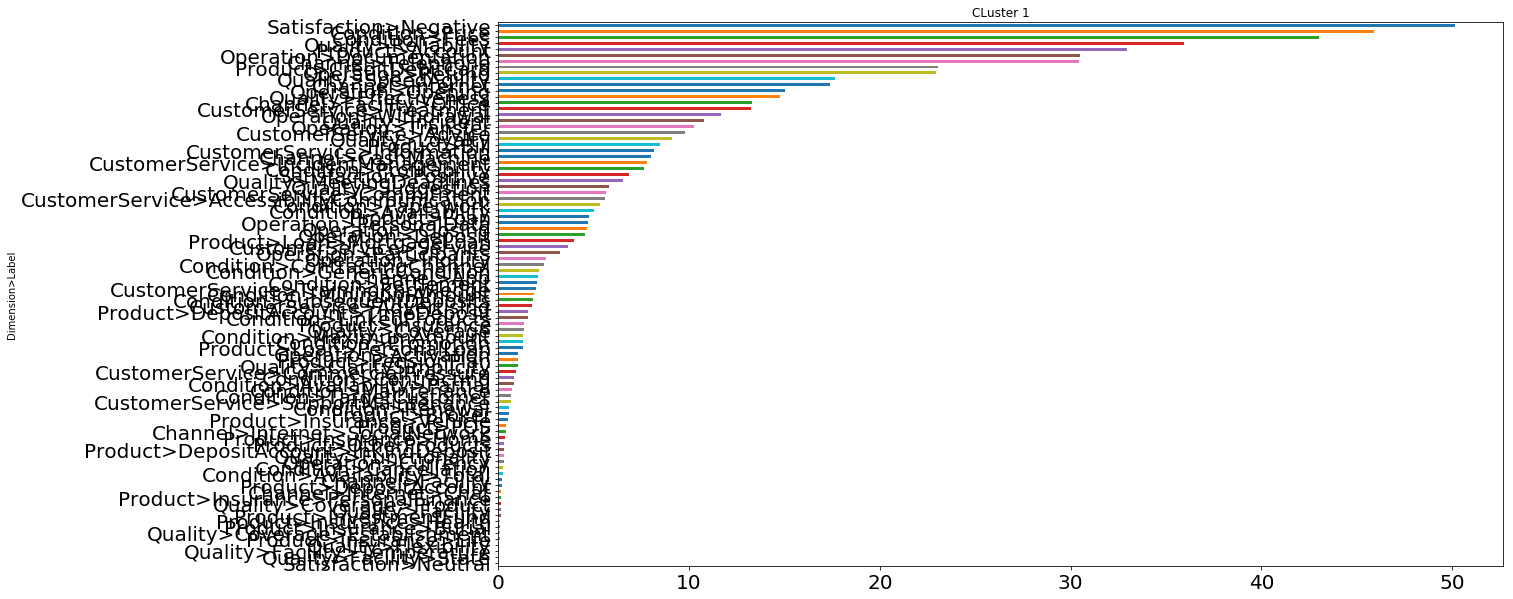

In [90]:
(100*labels[labels.cluster_labels == 1].groupby('Dimension>Label')['Dimension>Label'].count().sort_values(ascending=False)/len(df[df.cluster_labels == 1])).plot.barh(title='CLuster 1').invert_yaxis()

#len(labels[labels.cluster_labels == 1])

In [ ]:
(100*df2[df2.Dimension == 'Condition'].groupby(['Label']).Label.count().sort_values(ascending=False)/df2[df2.Dimension == 'Condition'].groupby(['Label']).Label.count().sort_values(ascending=False).sum()).plot.barh()

In [76]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

In [185]:

# Allocate three clusters.
cure_instance = cure(df.values, 3);
cure_instance.process();
clusters = cure_instance.get_clusters();

# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, input_data);
visualizer.show();

OSError: /cvmfs/atlas.cern.ch/repo/ATLASLocalRootBase/x86_64/Gcc/gcc493_x86_64_slc6/slc6/gcc49/lib64/libstdc++.so.6: version `CXXABI_1.3.9' not found (required by /home/caducovas/.local/lib/python2.7/site-packages/pyclustering/core/x64/linux/ccore.so)